Install Required Libraries




In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn


Load the Dataset

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
# Create a DataFrame with the features and target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Explore the Data

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check basic statistics of the dataset
print(df.describe())

# Count of malignant and benign cases
print(df['target'].value_counts())


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    5

Split the Data into Training and Test Sets

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (455, 30)
Test data shape: (114, 30)


Standardize the Data

Standardizing ensures that each feature contributes equally to the model, improving performance.

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data
X_test_scaled = scaler.transform(X_test)


Choose a Model

In [6]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', probability=True)

 Evaluate the Model

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 95.61%
Confusion Matrix:
 [[41  2]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Visualize Results

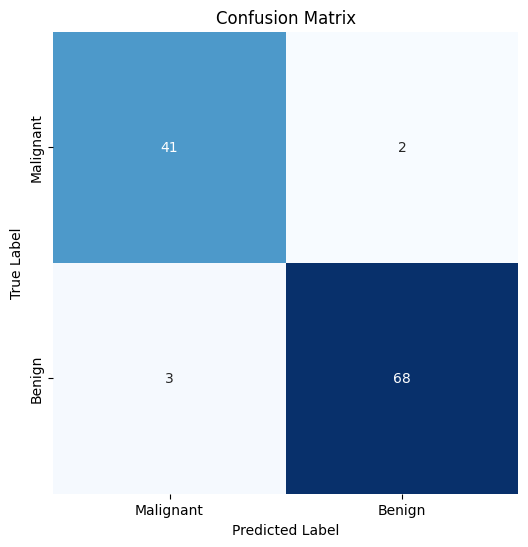

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Save and Load the Model

In [9]:
import joblib

# Save the model
joblib.dump(svm_model, 'breast_cancer_svm_model.pkl')

# Load the model
loaded_model = joblib.load('breast_cancer_svm_model.pkl')

# Test the loaded model
loaded_model.predict(X_test_scaled)


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])